### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#### Loading Data

In [47]:
train= pd.read_csv('Train.csv')
train.shape

(8523, 12)

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.isna().sum().sum()

3873

### About Data
    Shape-------->> (8523, 12)
    Dtype of Features---->>>(7- Objects, 4- float64, 1- int64)
    Number of Features(columns)-----> 12
    Features with missing data-------> Item_Weight, Outlet_Size
    Total Missing Values-------------> 3873
    
    Let first fill the missing values

In [48]:
# Filling missing and Mapping
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].median())
train['Outlet_Size']= train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace= True)

In [9]:
# Checking if any missing value have
train.isna().sum().sum()

0

In [10]:
# Counting Unique Value of each Feature
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [49]:
# Mapping correct Value in Item_fat_Content
train['Item_Fat_Content']= train['Item_Fat_Content'].map({'Low Fat': 'low fat',
                                                         'low fat': 'low fat',
                                                         'LF': 'low fat',
                                                         'Regular': 'regular',
                                                         #'regular': 'regular',
                                                         'reg': 'regular'})

In [12]:
# Checking the Values
train['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

#### Hist Plot

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

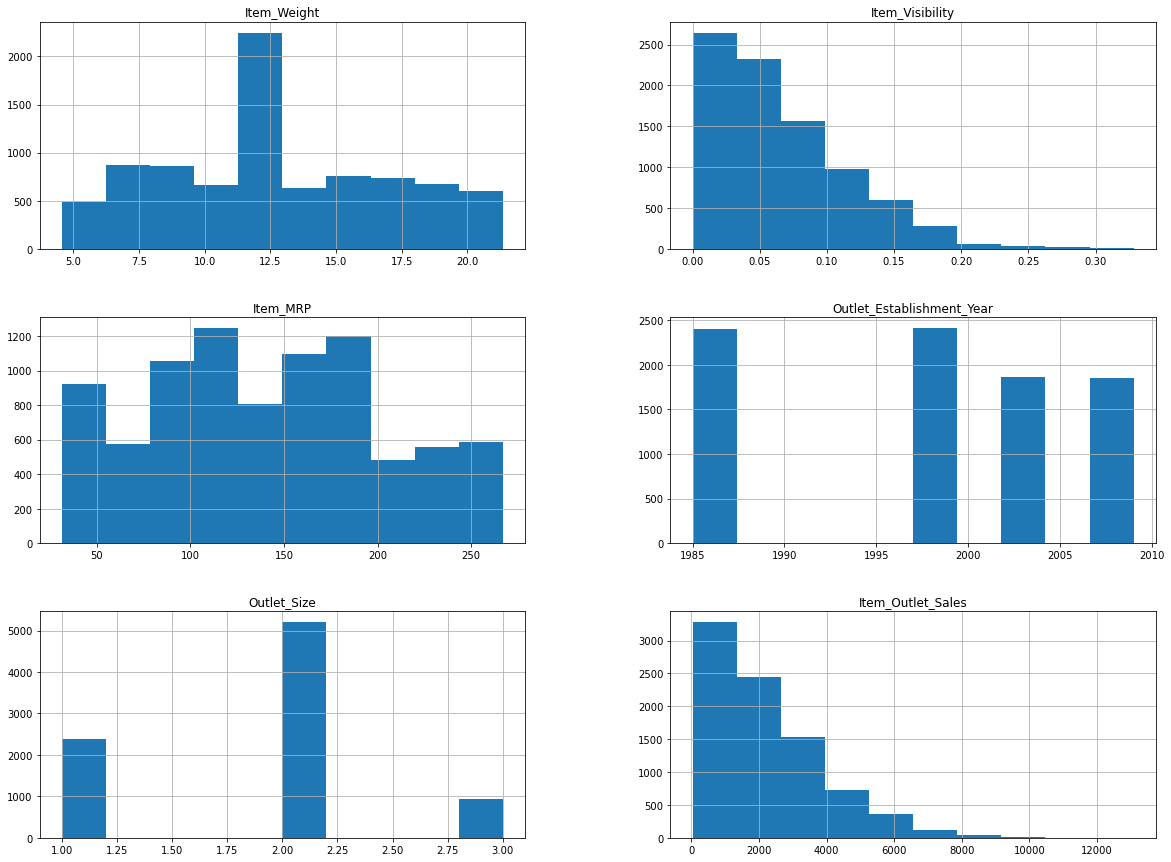

In [13]:
train.hist(figsize=(20,15))

In [14]:
item_id=pd.DataFrame(train['Item_Identifier'].value_counts())
item_id.tail()

Item_Identifier
FDN52                1
DRF48                1
FDO33                1
FDQ60                1
FDT35                1

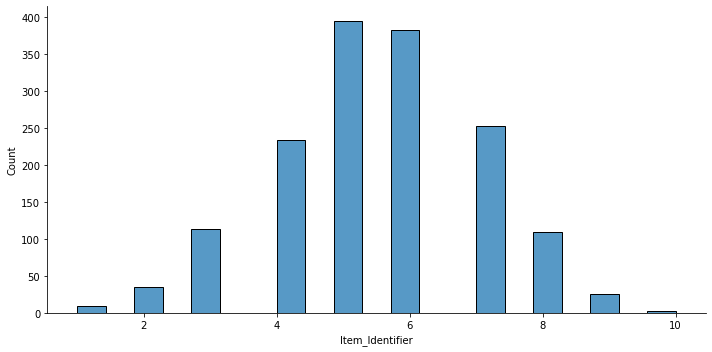

In [15]:
# Create Dataframe from Item_Identifier
sns.displot(data= item_id, x='Item_Identifier', height=5, aspect=2)

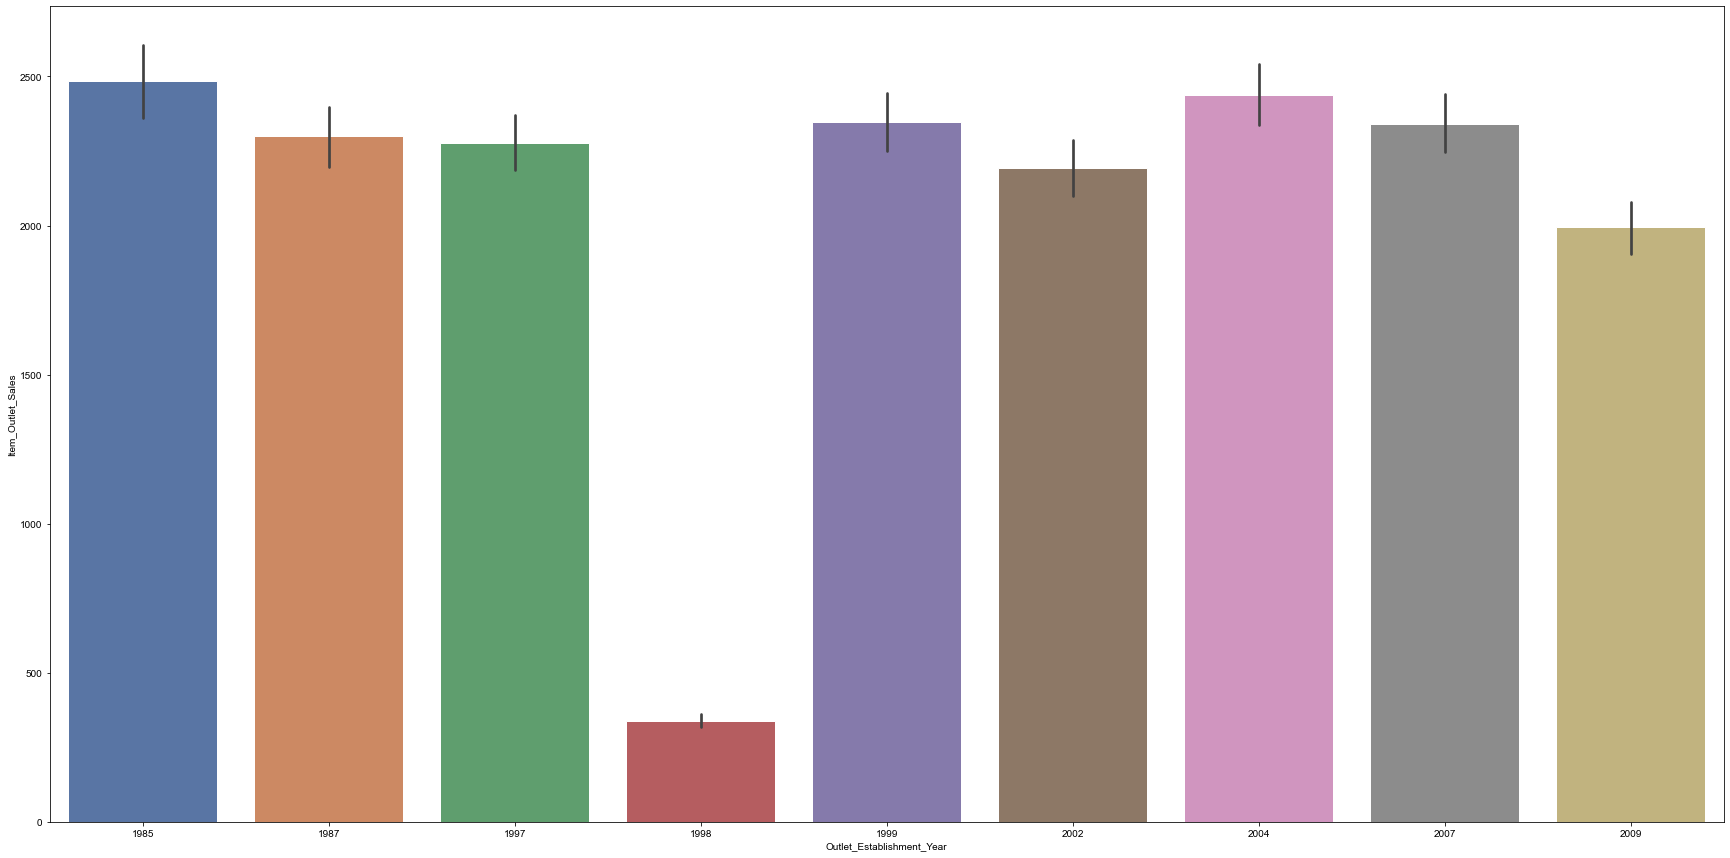

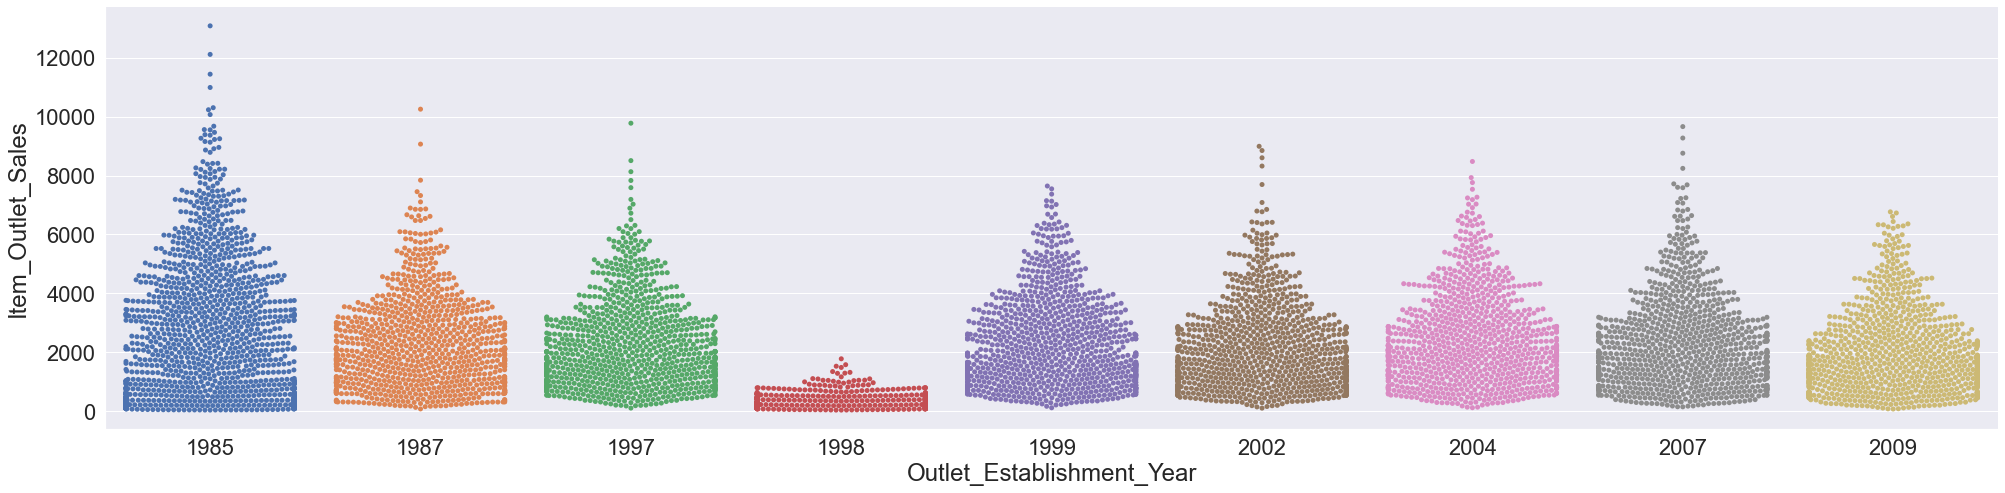

In [16]:
fig, axes= plt.subplots(figsize=(30,15))
sns.set(font_scale=2)
sns.barplot(data= train, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', axes= axes)
sns.catplot( data= train, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',kind= 'swarm', height=7, aspect=4)

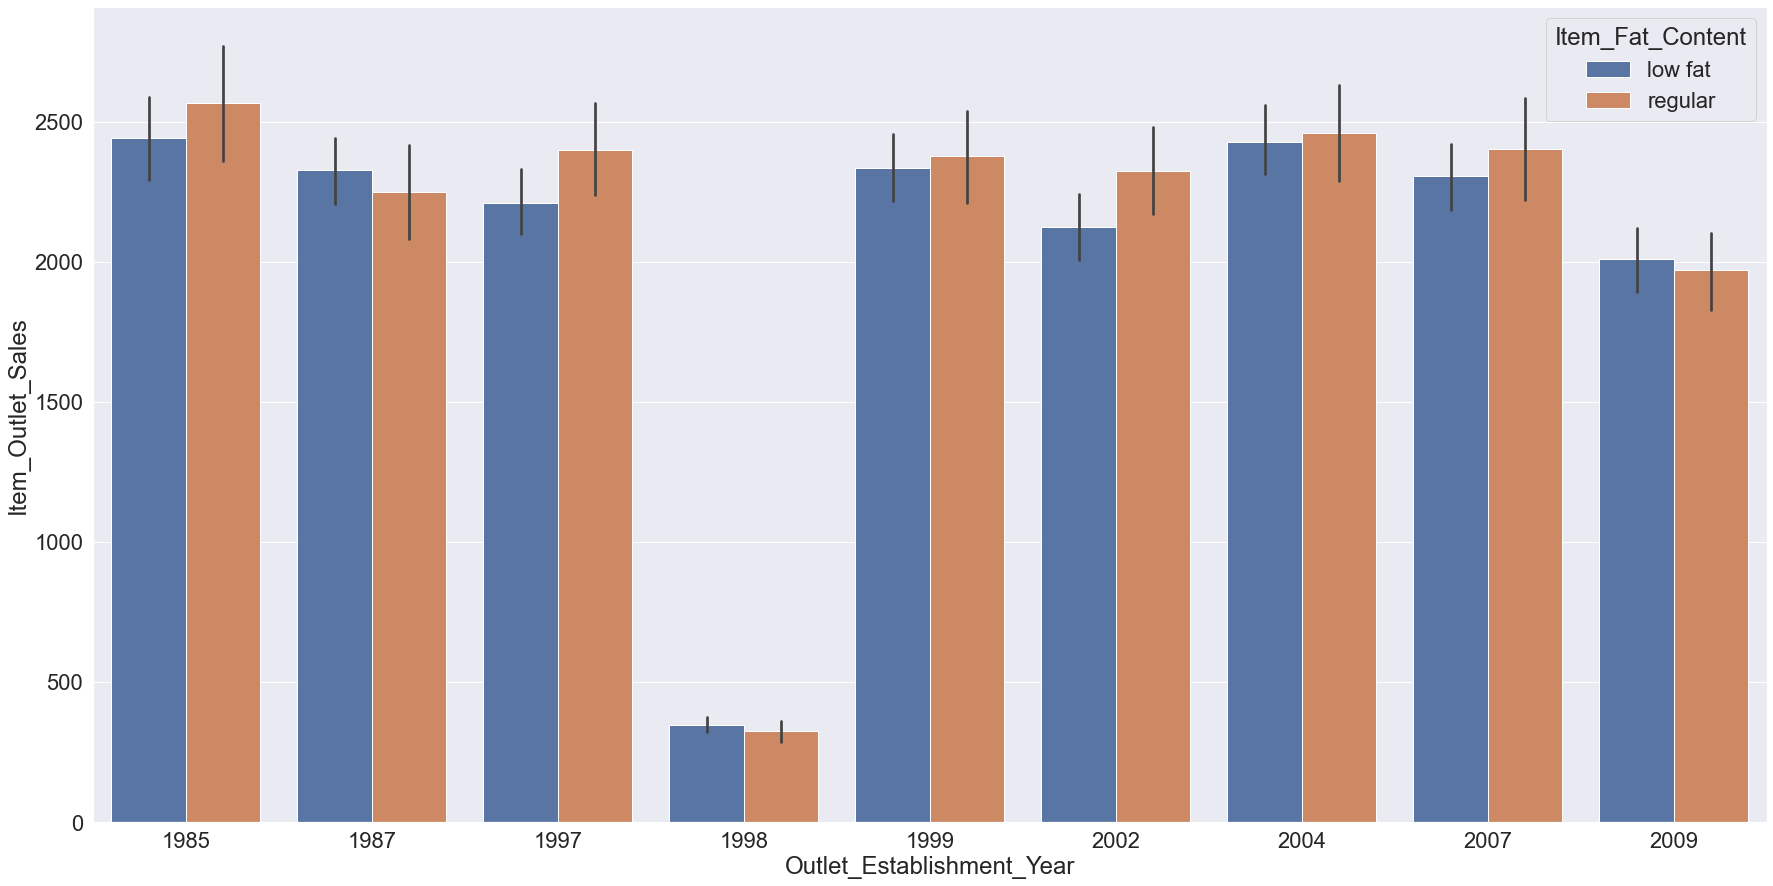

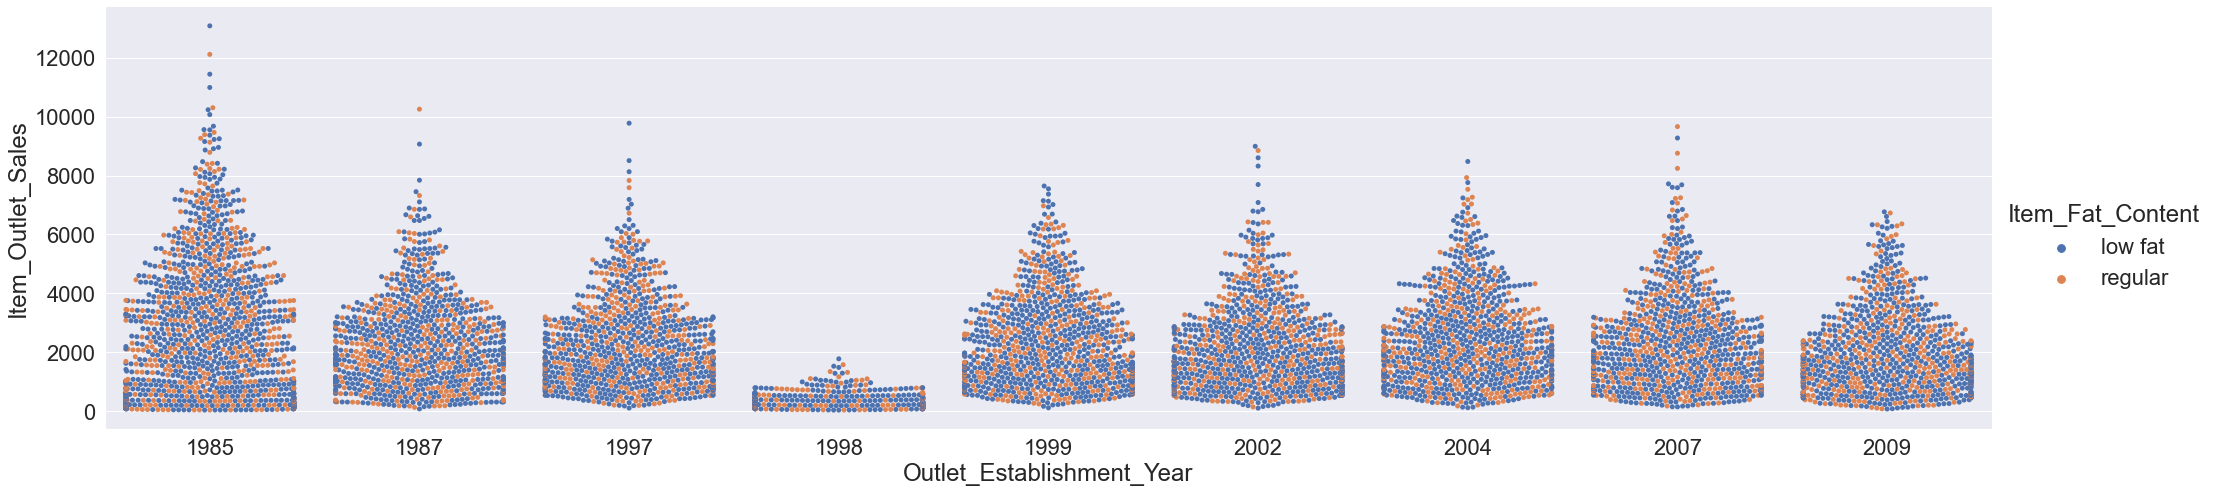

In [17]:
fig, axes= plt.subplots(figsize=(30,15))
sns.set(font_scale=2)
sns.barplot(data= train, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue= 'Item_Fat_Content', axes= axes)
sns.catplot( data= train, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Item_Fat_Content', kind= 'swarm', height=7, aspect=4)

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

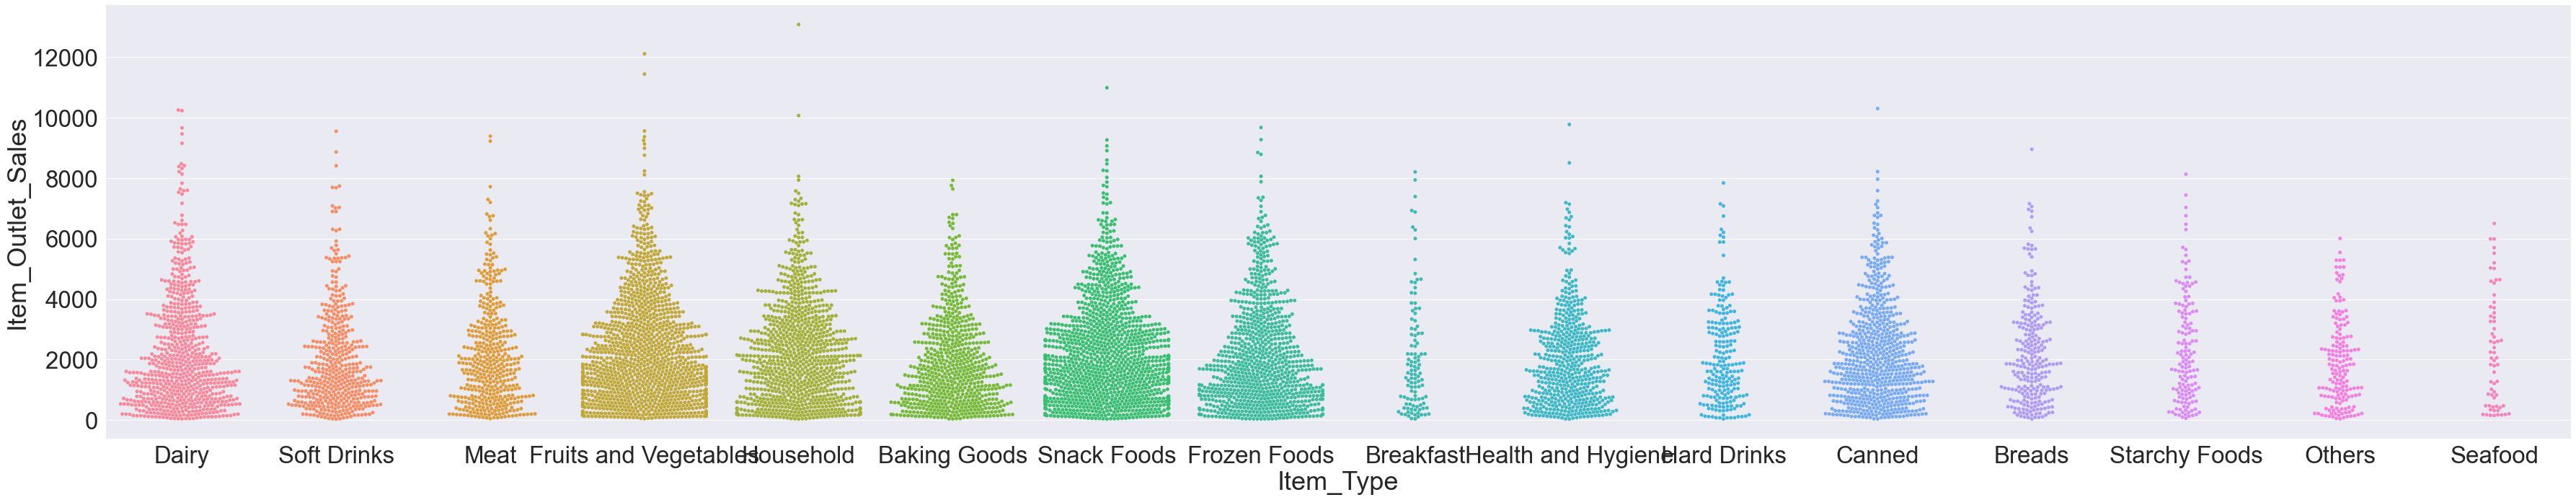

In [19]:
sns.set(font_scale= 3)
sns.catplot(data= train, x='Item_Type', y= 'Item_Outlet_Sales', kind= 'swarm', height=10, aspect=5)

<AxesSubplot:>

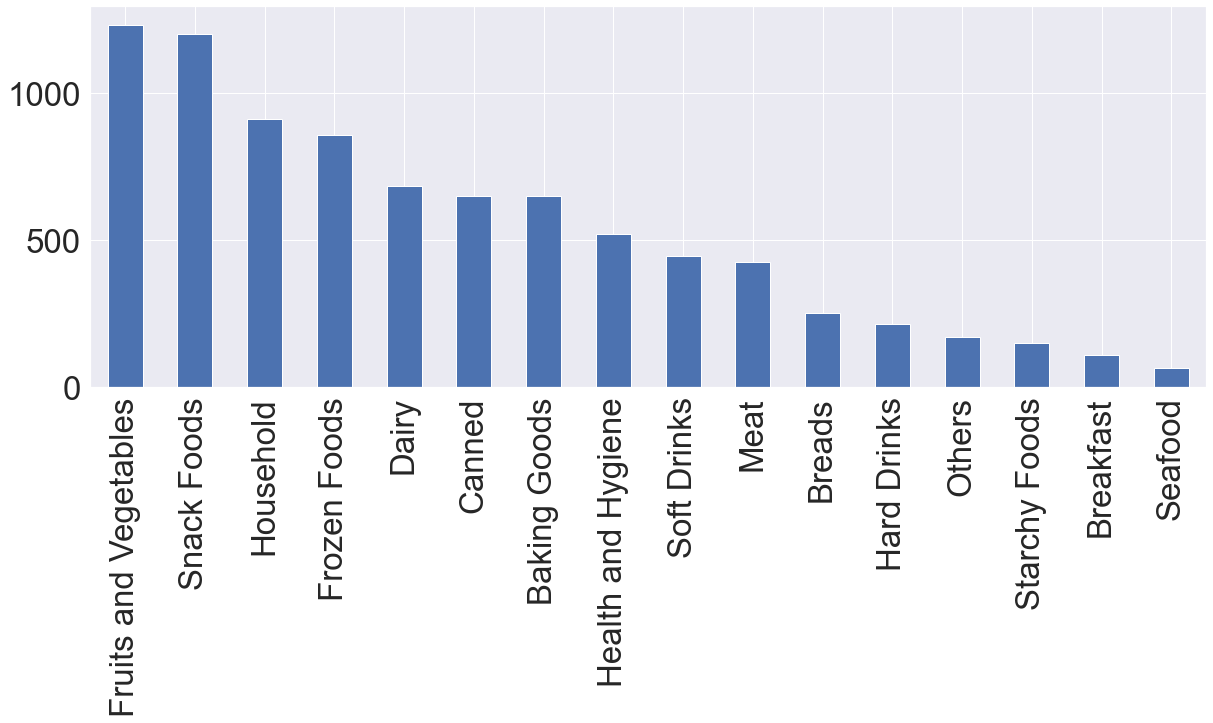

In [20]:
plt.figure(figsize=(20,7))
train['Item_Type'].value_counts().plot(kind='bar')


In [21]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Visualization About Outlet

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

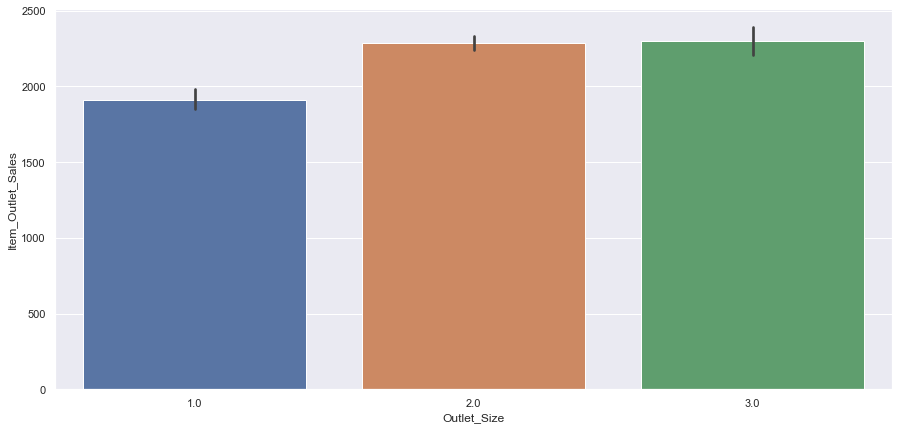

In [52]:
fig, axes= plt.subplots(figsize=(15,7))
sns.barplot(data= train, x='Outlet_Size', y='Item_Outlet_Sales', )

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

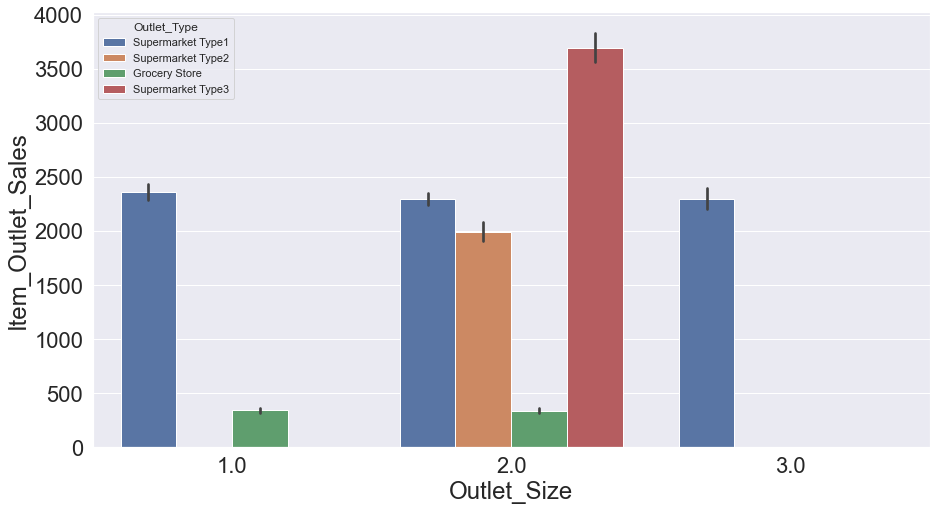

In [55]:
fig, axes= plt.subplots(figsize=(15,8))
sns.set(font_scale=1)
sns.barplot(data= train, x='Outlet_Size', y='Item_Outlet_Sales', hue= 'Outlet_Type')

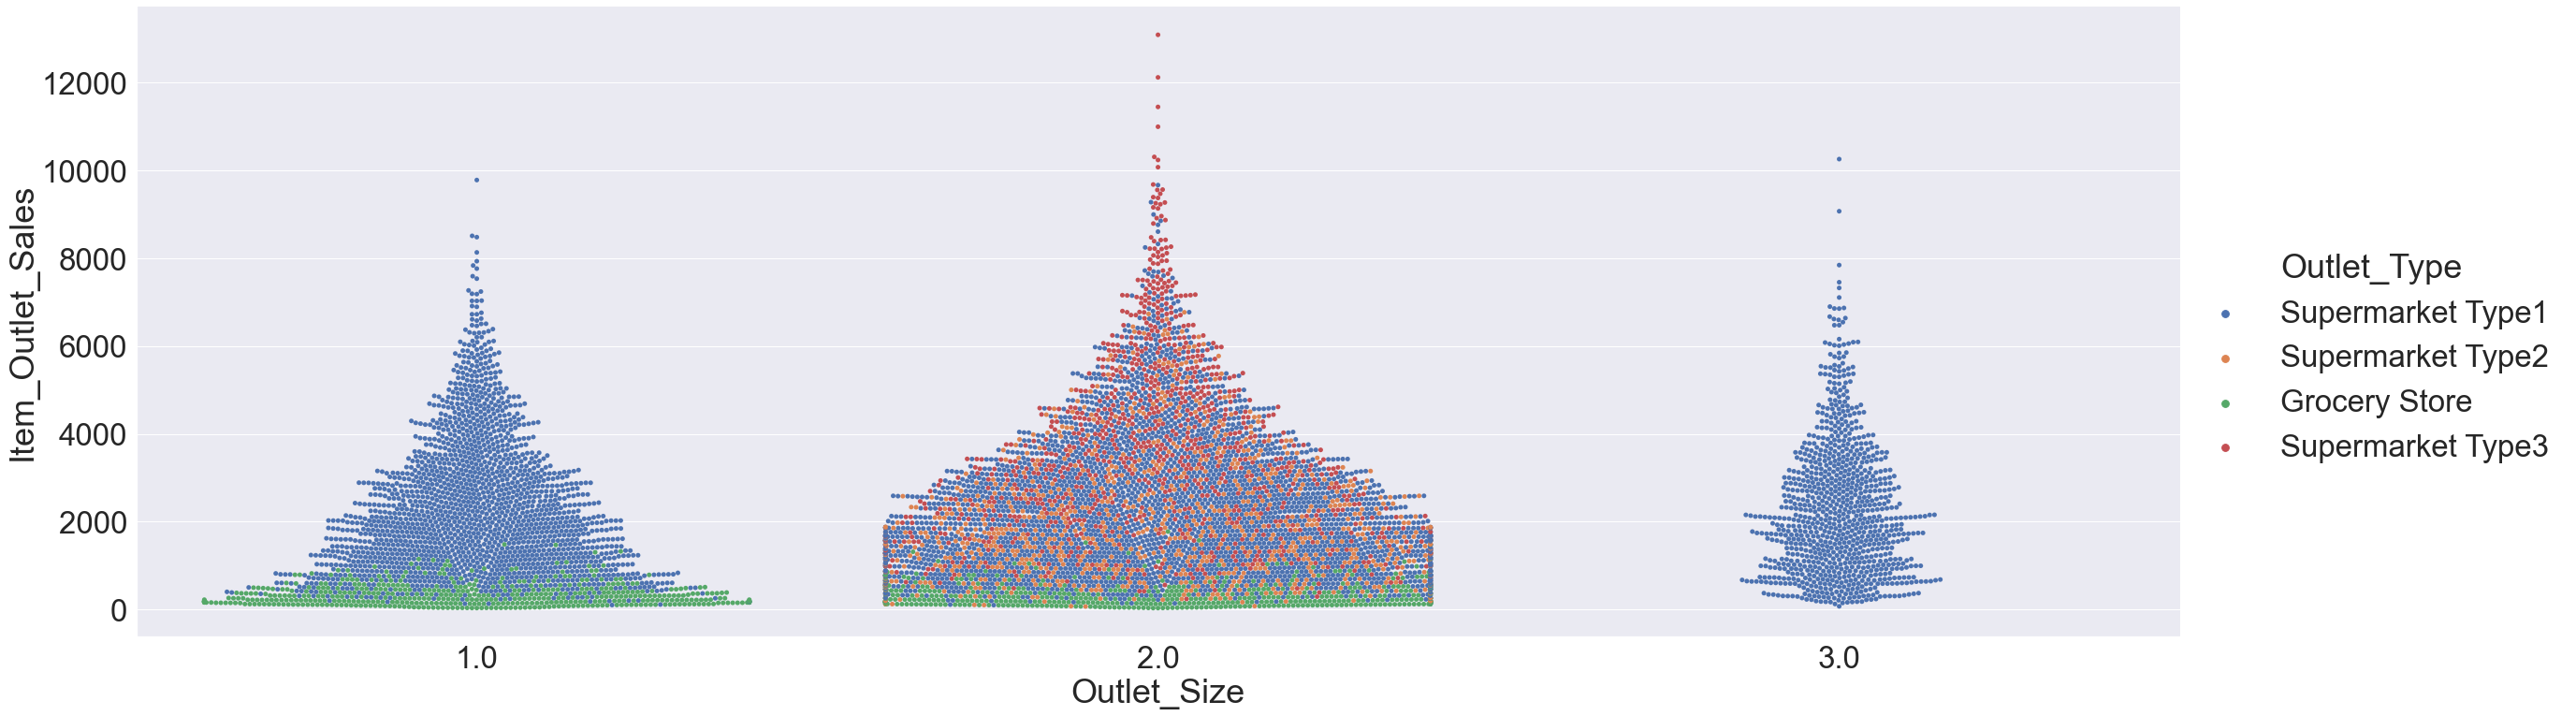

In [24]:
sns.set(font_scale=3)
sns.catplot(data= train, x='Outlet_Size', y='Item_Outlet_Sales', hue= 'Outlet_Type', kind= 'swarm', height=11, aspect=3)

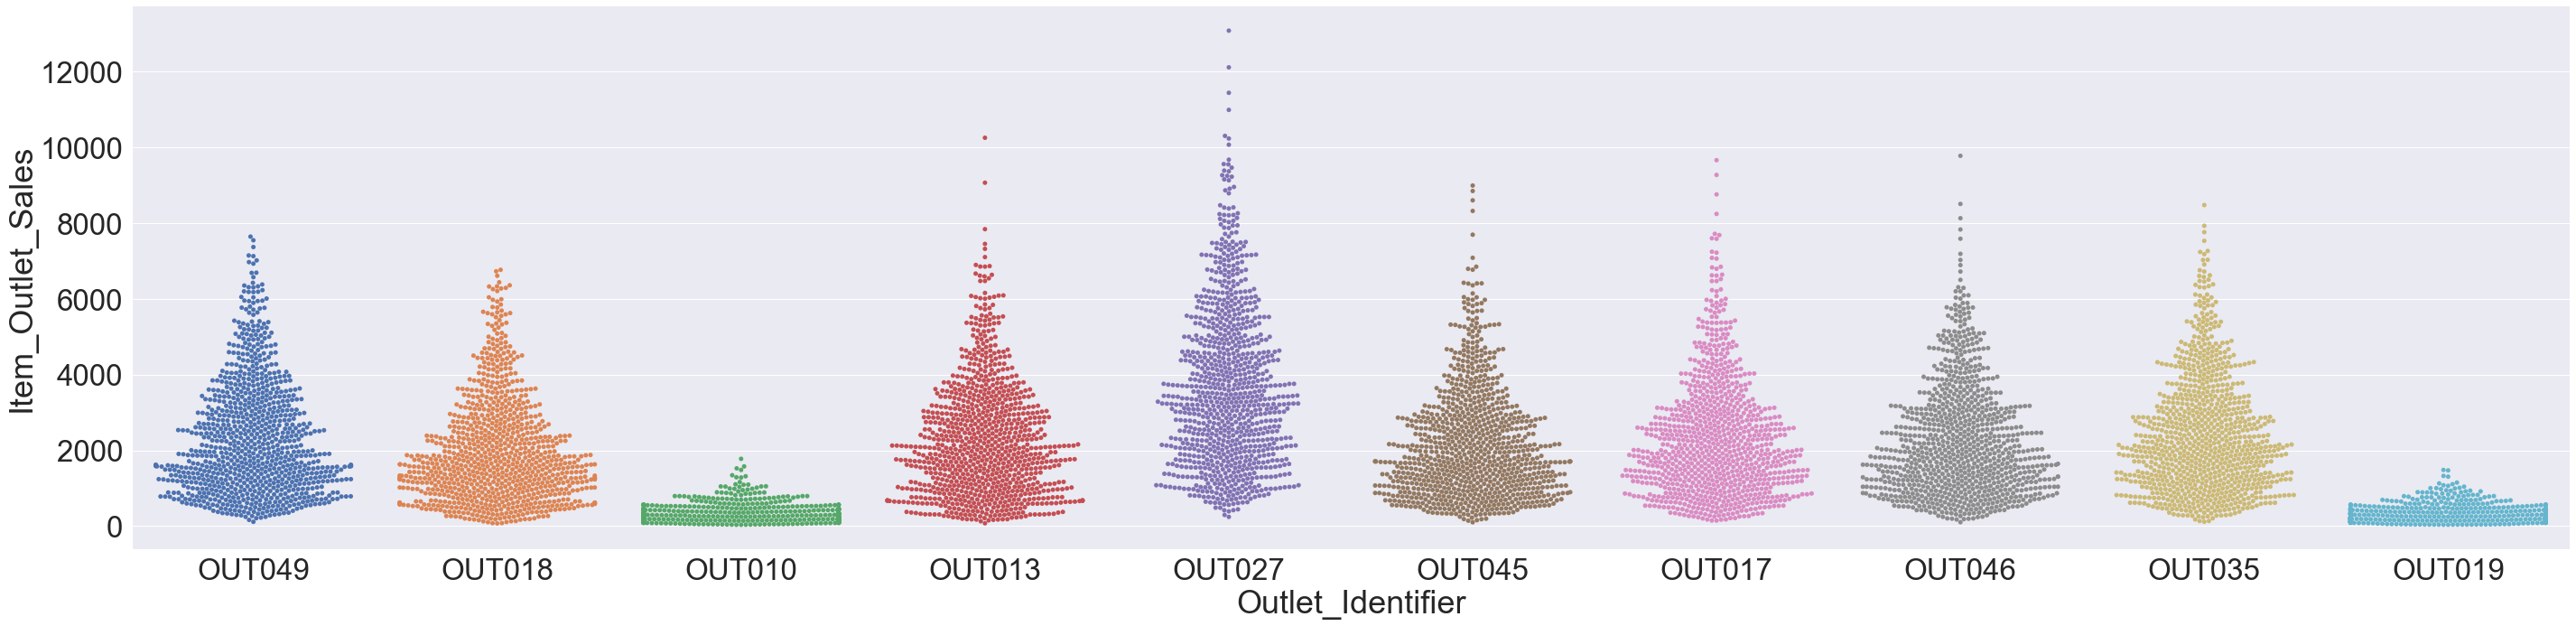

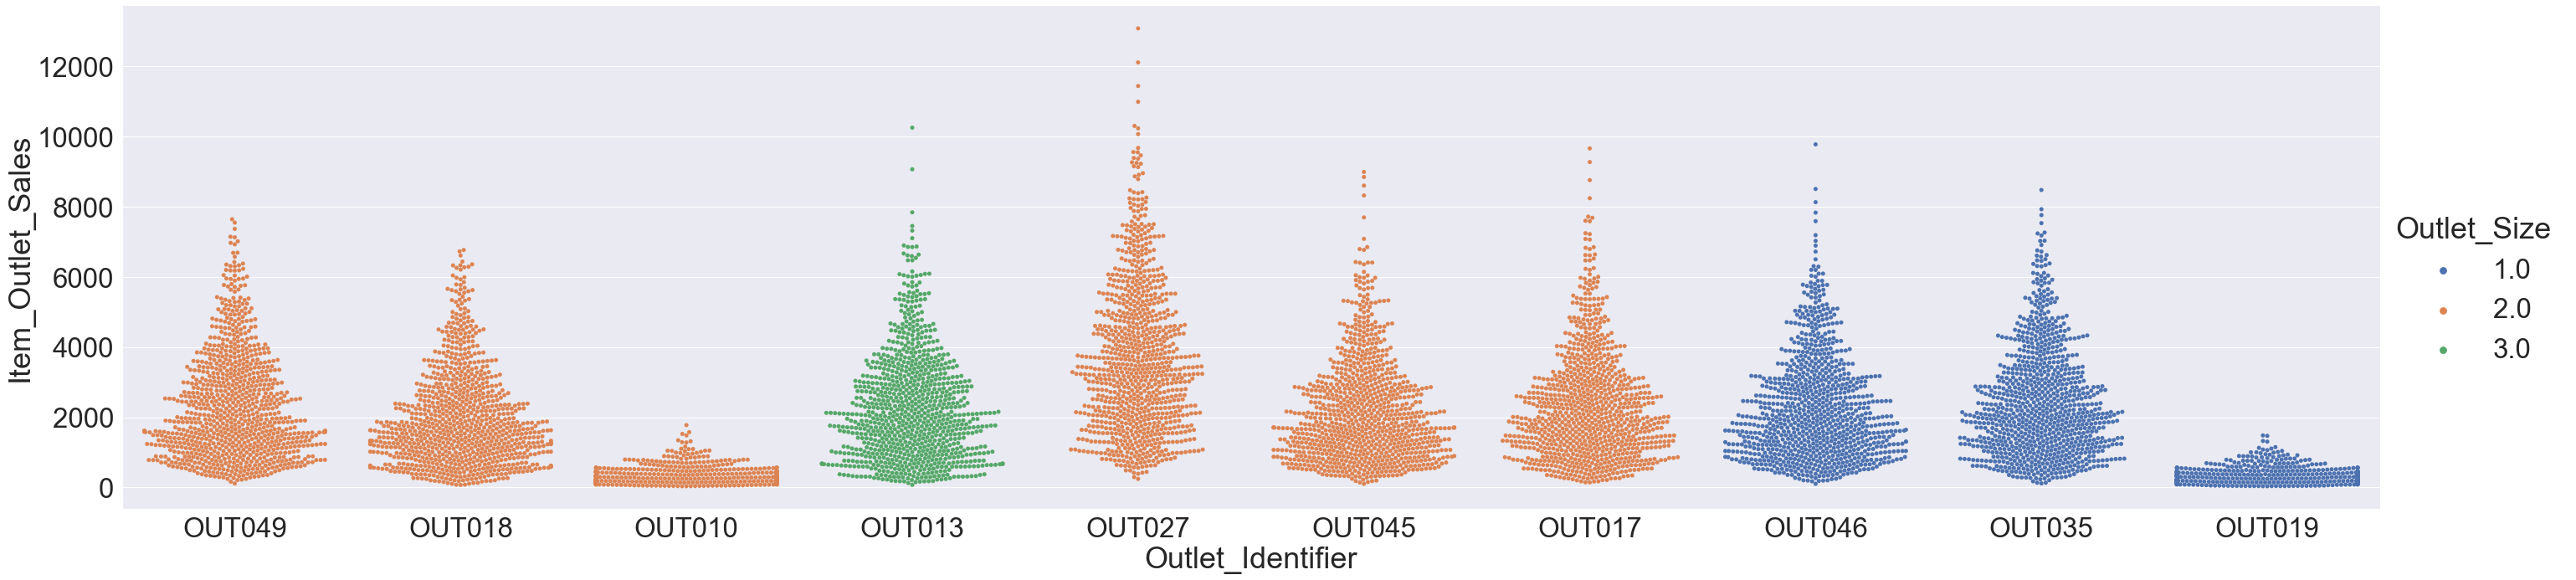

In [25]:
sns.set(font_scale=3)
sns.catplot(data= train, x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', kind='swarm', height=10, aspect=4)
sns.catplot(data= train, x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', hue= 'Outlet_Size', kind='swarm', height=10, aspect=4)


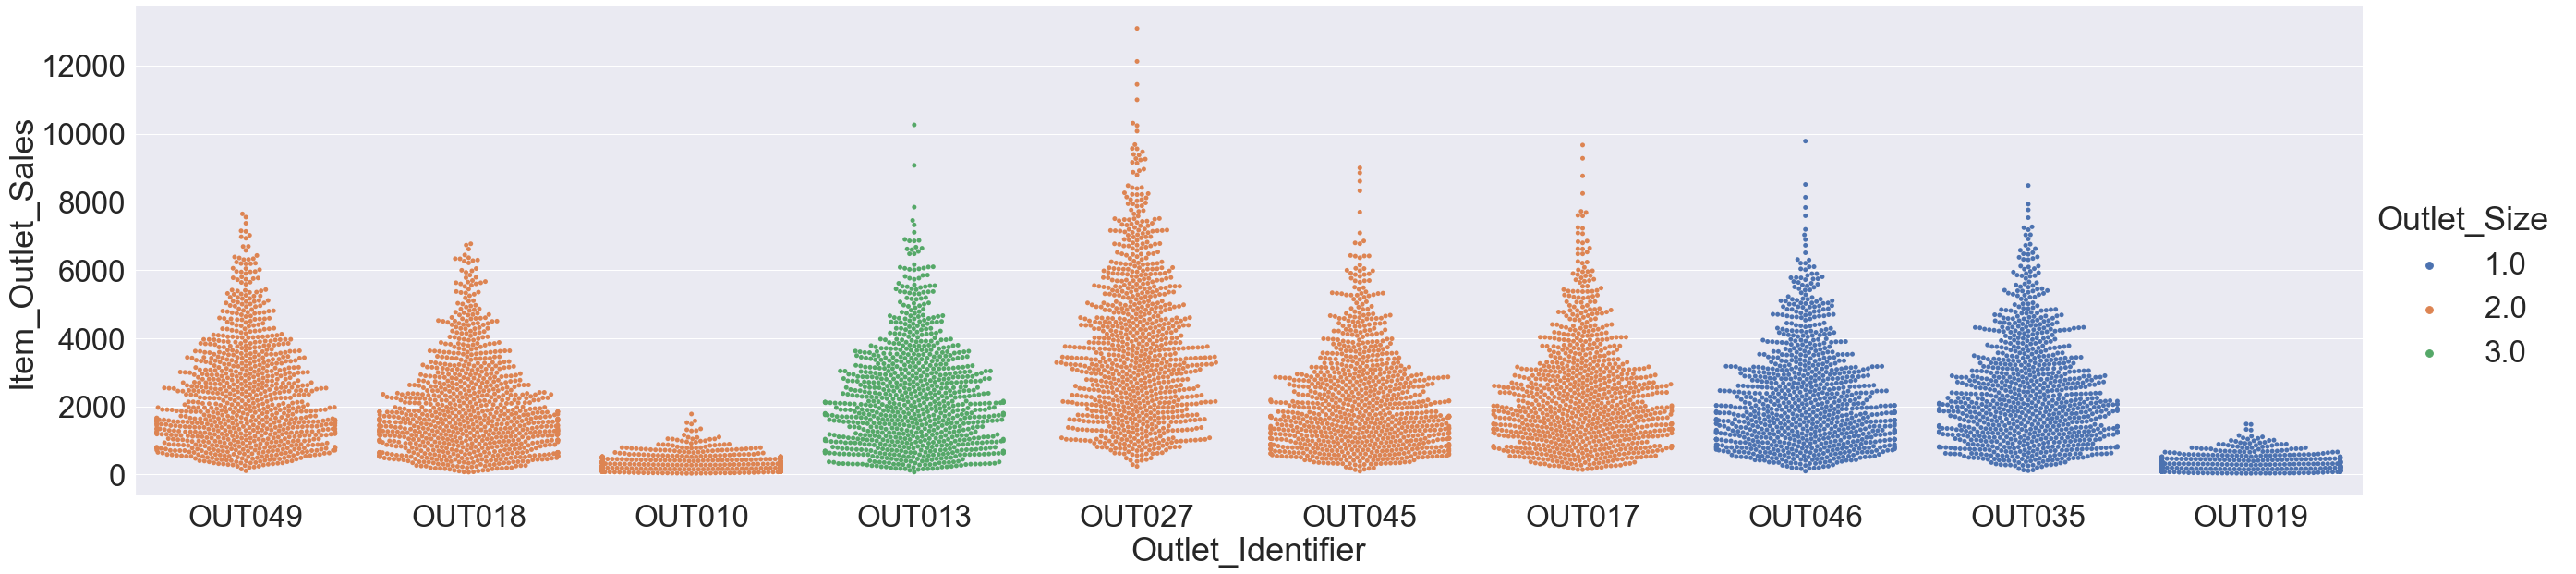

In [26]:
sns.catplot(data= train, x= 'Outlet_Identifier', y= 'Item_Outlet_Sales', hue= 'Outlet_Size', kind='swarm', height=9, aspect=4)

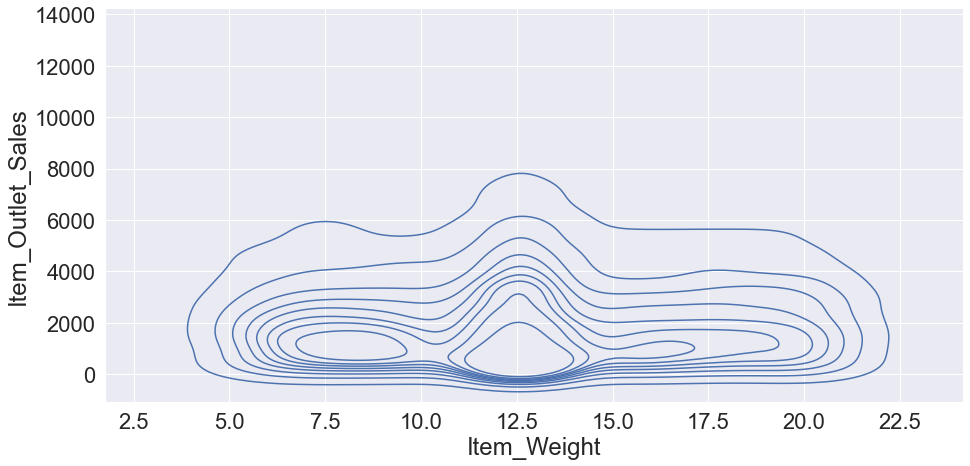

In [27]:
#fig, axes= plt.subplots(figsize=(8,5))
sns.set(font_scale=2)
sns.displot(data=train, x= 'Item_Weight', y= 'Item_Outlet_Sales', kind='kde', height=7, aspect=2 )

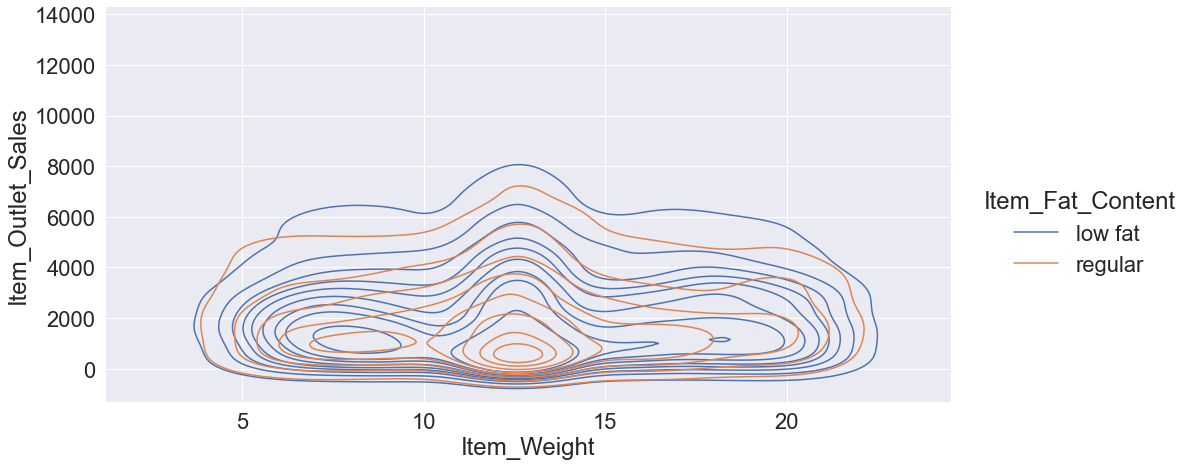

In [28]:
#fig, axes= plt.subplots(figsize=(8,5))
sns.set(font_scale=2)
sns.displot(data=train, x= 'Item_Weight', y= 'Item_Outlet_Sales',hue= 'Item_Fat_Content', kind='kde', height=7, aspect=2 )

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

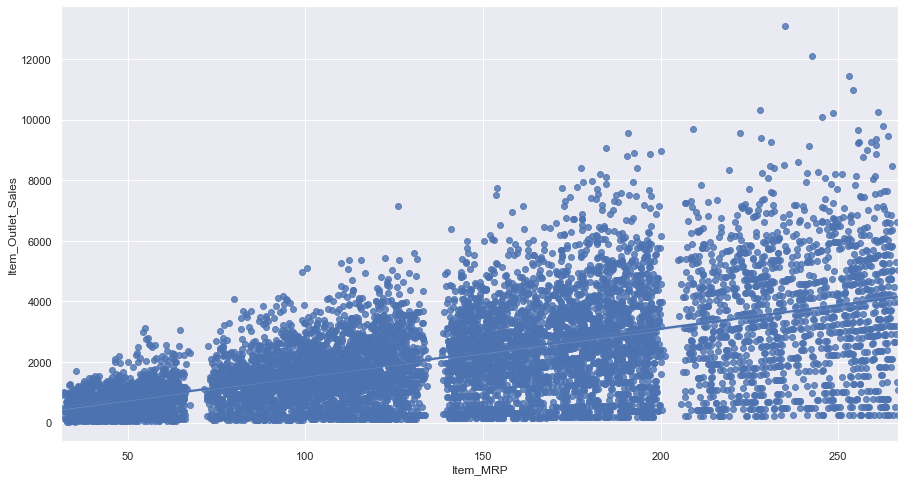

In [29]:
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(data= train, x= 'Item_MRP', y= 'Item_Outlet_Sales')

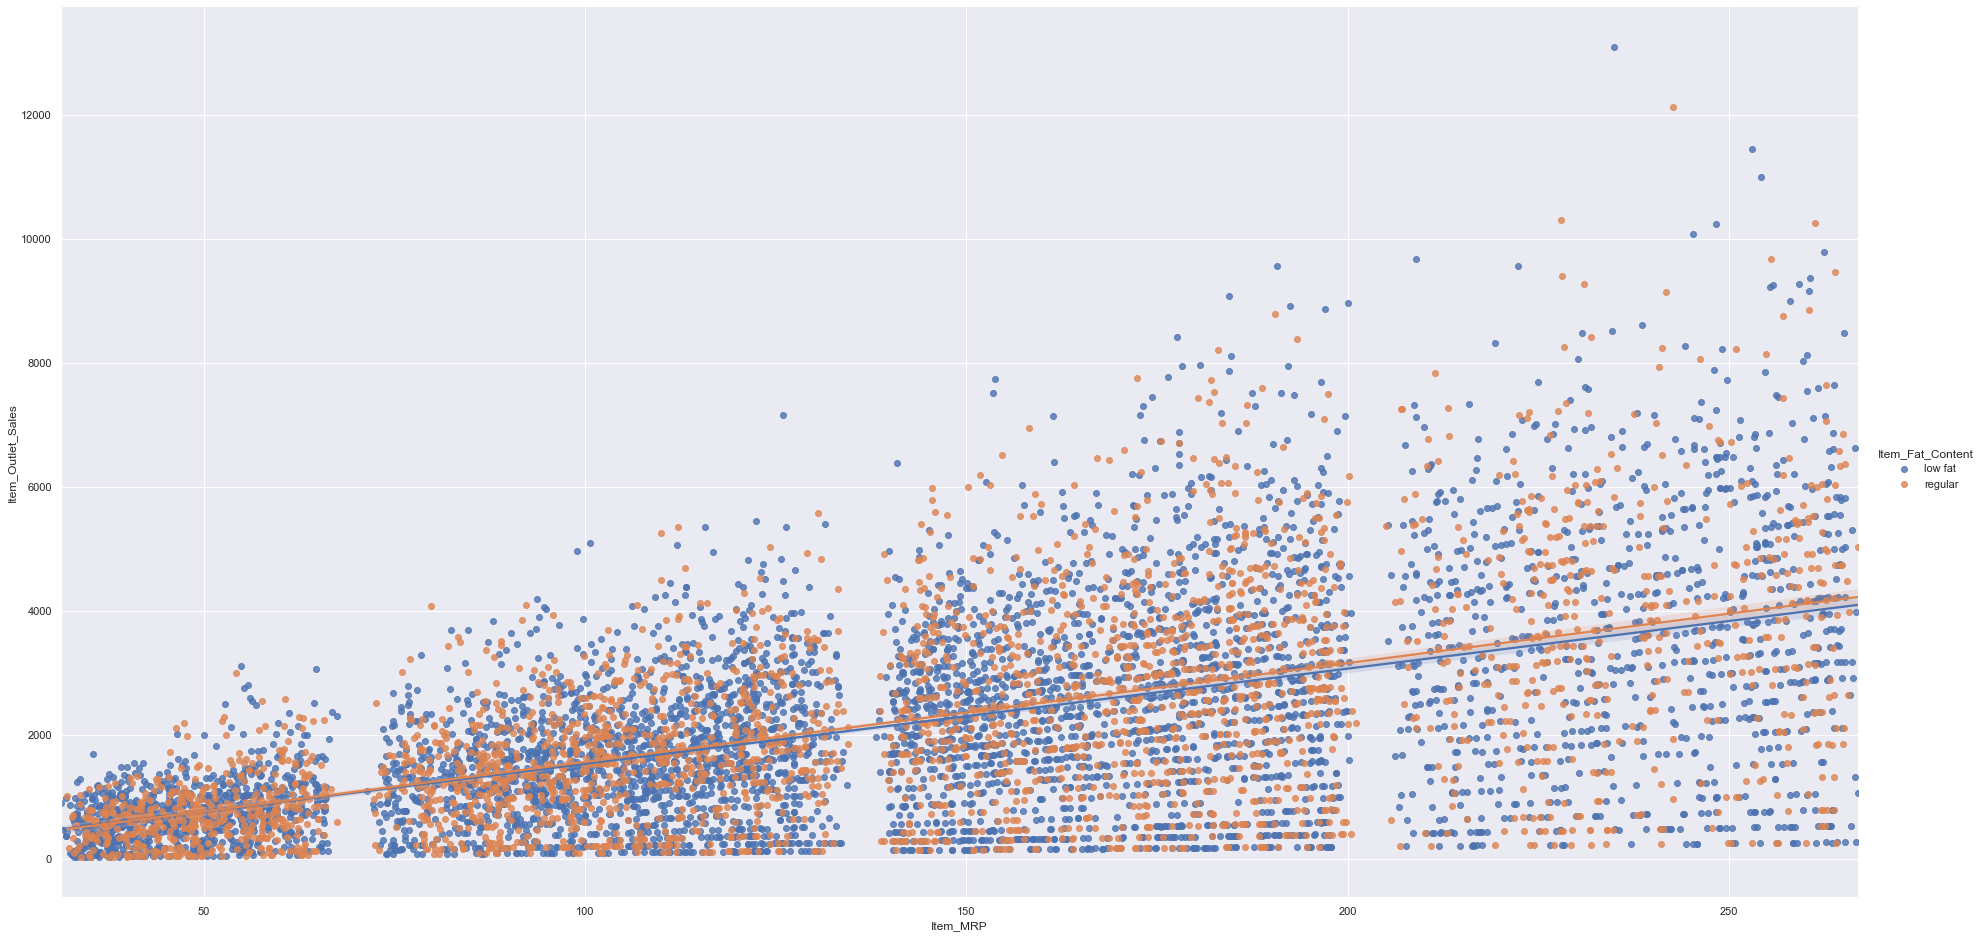

In [30]:
#fig, axes= plt.subplots(figsize=(8,5))
sns.set(font_scale=2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.lmplot(data= train, x='Item_MRP', y= 'Item_Outlet_Sales', hue='Item_Fat_Content', height=13, aspect=2)

In [31]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Preparing Data for Modeling

#### Importing Libraries

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
# Getting the Dummies
cat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
dum= pd.get_dummies(train[cat])
train = pd.concat([train, dum],axis=1)

### Loading the test Data

In [34]:
test=pd.read_csv('Test.csv')
test.shape

(5681, 11)

In [35]:
test.isna().sum().sum()

2582

#### Filling missing values

In [36]:
test["Outlet_Size"] = test["Outlet_Size"].map({"Small":1,"Medium":2,"High":3})
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].median())

In [37]:
test['Item_Fat_Content']= test['Item_Fat_Content'].map({'Low Fat': 'low fat',
                                                         'low fat': 'low fat',
                                                         'LF': 'low fat',
                                                         'Regular': 'regular',
                                                         #'regular': 'regular',
                                                         'reg': 'regular'})

In [38]:
# Getting dummies in test set

cat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
dum = pd.get_dummies(test[cat])
test = pd.concat([test, dum],axis=1)

#### Dropping labels

In [39]:
train.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier',
                     'Outlet_Establishment_Year', 'Item_Identifier',"Item_Type"],axis=1,inplace = True)
test.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier',
                    'Outlet_Establishment_Year','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [40]:
#Splitting Feature and Label
X_train = train.drop(labels = ["Item_Outlet_Sales"],axis=1)
y_train = train["Item_Outlet_Sales"]
X_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Type_Grocery Store  \
0         9.30         0.016047  249.8092                          0   
1         5.92         0.019278   48.2692                          0   
2        17.50         0.016760  141.6180                          0   
3        19.20         0.000000  182.0950                          1   
4         8.93         0.000000   53.8614                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  Outlet_Location_Type_Tier 1  \
0                              0                            1   
1                              0                            0   
2                              0                            1   
3                              0                            0   
4                              0                            0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            1  ...   
4                            0                            1  ...   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0                    0               0   
1                             0                    0               0   
2                             0                    0               1   
3                             0                    0               0   
4                             0                    1               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
3                 0                  0                      0   
4                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                      0                        0  
1                      1                        0  
2                      0                        0  
3                      0                        0  
4                      0                        0  

[5 rows x 28 columns]

In [41]:
x = X_train.values #returns a numpy array
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.4)

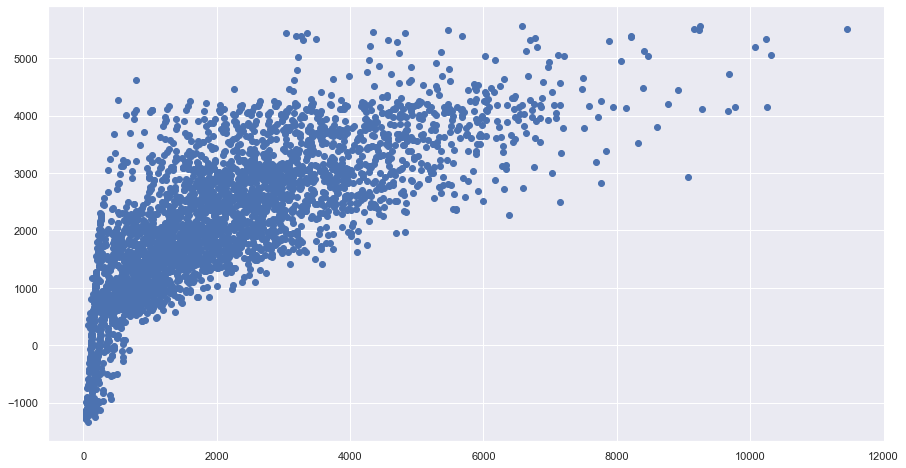

In [43]:
model = LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
plt.scatter(y_test, preds)
plt.show()

In [44]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))


MAE: 831.0842699120235
MSE: 1272193.9579060709
RMSE: 1127.9157583375058
